In [2]:
import pandas as pd
import requests
import numpy as np
import os
import json

In [4]:
response = requests.get(url = "http://api.citybik.es/v2/networks/biketown")
response.json()
stations = response.json()['network']['stations']
df= pd.json_normalize(stations)
df.head()
x= df.iloc[::,3:5]
x
x.to_csv('citybikesdata.csv')


# Foursquare

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [51]:
import pandas as pd
import requests
import os
import json

# Assuming x is your DataFrame with latitude and longitude columns
locations_df = x
y=[]

# Foursquare API parameters
api_key = os.environ["API_KEY_FS"]
url = 'https://api.foursquare.com/v3/places/search'  

# Iterate over each row in the DataFrame
for index, row in locations_df.iterrows():
    params = {
        'll': f"{row['latitude']},{row['longitude']}",
        'radius': '1000',
        'categories': '10004',
    }

    headers = {
        'Accept': 'application/json',
        'Authorization': api_key
    }

    result = requests.get(url, params=params, headers=headers)

    #Check the status code and print the response
    if result.status_code == 200:
        data = result.json()
        y.append(data)
        # Process the data as needed
        #print(f"Results for {row['latitude']},{row['longitude']}:")
        print(data)

         #else:
        #print(f"Error for {row['latitude']},{row['longitude']}: {result.status_code}")
        #print(result.json())  

   

{'results': [{'fsq_id': '8a26494489114efe29b13718', 'categories': [{'id': 10004, 'name': 'Art Gallery', 'short_name': 'Art Gallery', 'plural_name': 'Art Galleries', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_', 'suffix': '.png'}}], 'chains': [], 'closed_bucket': 'Unsure', 'distance': 420, 'geocodes': {'drop_off': {'latitude': 45.508627, 'longitude': -122.611335}, 'main': {'latitude': 45.508605, 'longitude': -122.611641}, 'roof': {'latitude': 45.508605, 'longitude': -122.611641}}, 'link': '/v3/places/8a26494489114efe29b13718', 'location': {'address': '2001 SE 50th Ave', 'census_block': '410510014004000', 'country': 'US', 'dma': 'Portland, Or', 'formatted_address': '2001 SE 50th Ave, Portland, OR 97215', 'locality': 'Portland', 'postcode': '97215', 'region': 'OR'}, 'name': 'Historic Art Studios', 'related_places': {}}, {'fsq_id': '9d925baf2e5acd0f8eb89507', 'categories': [{'id': 10004, 'name': 'Art Gallery', 'short_name': 'Art Gallery', 'plur

In [52]:
y

[{'results': [{'fsq_id': '8a26494489114efe29b13718',
    'categories': [{'id': 10004,
      'name': 'Art Gallery',
      'short_name': 'Art Gallery',
      'plural_name': 'Art Galleries',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_',
       'suffix': '.png'}}],
    'chains': [],
    'closed_bucket': 'Unsure',
    'distance': 420,
    'geocodes': {'drop_off': {'latitude': 45.508627, 'longitude': -122.611335},
     'main': {'latitude': 45.508605, 'longitude': -122.611641},
     'roof': {'latitude': 45.508605, 'longitude': -122.611641}},
    'link': '/v3/places/8a26494489114efe29b13718',
    'location': {'address': '2001 SE 50th Ave',
     'census_block': '410510014004000',
     'country': 'US',
     'dma': 'Portland, Or',
     'formatted_address': '2001 SE 50th Ave, Portland, OR 97215',
     'locality': 'Portland',
     'postcode': '97215',
     'region': 'OR'},
    'name': 'Historic Art Studios',
    'related_places': {}},
   {'fsq_id'

In [53]:
j= pd.json_normalize(y)
j


results  \
0    [{'fsq_id': '8a26494489114efe29b13718', 'categ...   
1    [{'fsq_id': '28eee729f4d742d9fe5e33c3', 'categ...   
2                                                   []   
3    [{'fsq_id': '9d925baf2e5acd0f8eb89507', 'categ...   
4                                                   []   
..                                                 ...   
233  [{'fsq_id': '4d62ef7191cfa1cd53953839', 'categ...   
234  [{'fsq_id': '4d62ef7191cfa1cd53953839', 'categ...   
235  [{'fsq_id': '4b19c42ef964a520c5e323e3', 'categ...   
236  [{'fsq_id': '556e2909498e12a6fdd65819', 'categ...   
237  [{'fsq_id': '548600a9498ed8a19e784c3c', 'categ...   

     context.geo_bounds.circle.center.latitude  \
0                                    45.511950   
1                                    45.548276   
2                                    45.553917   
3                                    45.516585   
4                                    45.493337   
..                                         ...   
233                                  45.517899   
234                                  45.518103   
235                                  45.498947   
236                                  45.552358   
237                                  45.570366   

     context.geo_bounds.circle.center.longitude  \
0                                   -122.614160   
1                                   -122.611164   
2                                   -122.602071   
3                                   -122.616038   
4                                   -122.623397   
..                                          ...   
233                                 -122.660052   
234                                 -122.657650   
235                                 -122.637669   
236                                 -122.625588   
237                                 -122.636043   

     context.geo_bounds.circle.radius  
0                                1000  
1                                1000  
2                                1000  
3                                1000  
4                                1000  
..                                ...  
233                              1000  
234                              1000  
235                              1000  
236                              1000  
237                              1000  

[238 rows x 4 columns]

In [55]:
results = pd.json_normalize(y, record_path ='results')
results

fsq_id  \
0     8a26494489114efe29b13718   
1     9d925baf2e5acd0f8eb89507   
2     28eee729f4d742d9fe5e33c3   
3     eb1ba44796694c1608ba9e5b   
4     9d925baf2e5acd0f8eb89507   
...                        ...   
1365  28eee729f4d742d9fe5e33c3   
1366  548600a9498ed8a19e784c3c   
1367  9ec64dcdded245b5c90d5afc   
1368  8dbb3b7f9ab04597a3cde0cd   
1369  0ebcb8a76eaa45389654811f   

                                             categories chains  \
0     [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
1     [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
2     [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
3     [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
4     [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
...                                                 ...    ...   
1365  [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
1366  [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
1367  [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
1368  [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   
1369  [{'id': 10004, 'name': 'Art Gallery', 'short_n...     []   

       closed_bucket  distance                                 link  \
0             Unsure       420  /v3/places/8a26494489114efe29b13718   
1             Unsure       595  /v3/places/9d925baf2e5acd0f8eb89507   
2     VeryLikelyOpen       717  /v3/places/28eee729f4d742d9fe5e33c3   
3             Unsure       958  /v3/places/eb1ba44796694c1608ba9e5b   
4             Unsure       647  /v3/places/9d925baf2e5acd0f8eb89507   
...              ...       ...                                  ...   
1365  VeryLikelyOpen       623  /v3/places/28eee729f4d742d9fe5e33c3   
1366          Unsure       490  /v3/places/548600a9498ed8a19e784c3c   
1367      LikelyOpen       472  /v3/places/9ec64dcdded245b5c90d5afc   
1368          Unsure       821  /v3/places/8dbb3b7f9ab04597a3cde0cd   
1369          Unsure       866  /v3/places/0ebcb8a76eaa45389654811f   

                           name  geocodes.drop_off.latitude  \
0          Historic Art Studios                   45.508627   
1         NW Travelers Emporium                   45.512042   
2     Artistic Portland Gallery                   45.548301   
3                  Unlocked Art                         NaN   
4         NW Travelers Emporium                   45.512042   
...                         ...                         ...   
1365  Artistic Portland Gallery                   45.548301   
1366  Verum Ultimum Art Gallery                         NaN   
1367          Bolling & Company                   45.567143   
1368                The Badfire                         NaN   
1369      Hail Mary Art Gallery                         NaN   

      geocodes.drop_off.longitude  geocodes.main.latitude  ...  \
0                     -122.611335               45.508605  ...   
1                     -122.621781               45.512375  ...   
2                     -122.620383               45.548092  ...   
3                             NaN               45.539687  ...   
4                     -122.621781               45.512375  ...   
...                           ...                     ...  ...   
1365                  -122.620383               45.548092  ...   
1366                          NaN               45.566084  ...   
1367                  -122.631733               45.567143  ...   
1368                          NaN               45.577724  ...   
1369                          NaN               45.562590  ...   

      location.postcode  location.region             timezone  \
0                 97215               OR                  NaN   
1                 97214               OR                  NaN   
2                 97212               OR                  NaN   
3                 97218               OR                  NaN   
4                 97214               OR                  NaN   
...                 ...      

In [56]:
#further exploring the nested categories
results['categories']
d=pd.json_normalize(results['categories'])
g= d[0]
pd.json_normalize(g)

id         name   short_name    plural_name  \
0     10004  Art Gallery  Art Gallery  Art Galleries   
1     10004  Art Gallery  Art Gallery  Art Galleries   
2     10004  Art Gallery  Art Gallery  Art Galleries   
3     10004  Art Gallery  Art Gallery  Art Galleries   
4     10004  Art Gallery  Art Gallery  Art Galleries   
...     ...          ...          ...            ...   
1365  10004  Art Gallery  Art Gallery  Art Galleries   
1366  10004  Art Gallery  Art Gallery  Art Galleries   
1367  10004  Art Gallery  Art Gallery  Art Galleries   
1368  10004  Art Gallery  Art Gallery  Art Galleries   
1369  10004  Art Gallery  Art Gallery  Art Galleries   

                                            icon.prefix icon.suffix  
0     https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
1     https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
2     https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
3     https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
4     https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
...                                                 ...         ...  
1365  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
1366  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
1367  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
1368  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  
1369  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png  

[1370 rows x 6 columns]

In [57]:
# no. of unique fsq art gallery ids
s = len(pd.unique(results['fsq_id']))
s

177

In [58]:
k=results.drop(['categories','link', 'chains', 'geocodes.drop_off.latitude', 'geocodes.drop_off.longitude',
                 'geocodes.roof.latitude','location.cross_street', 'location.address_extended', 
                'related_places.parent.fsq_id', 'related_places.parent.categories', 'related_places.parent.name', 
                'location.po_box', 'related_places.children','geocodes.roof.longitude', 'location.dma', 
                'timezone', 'location.census_block', 'location.postcode', 'location.address', 'location.country', 'location.locality', 'location.region'], axis=1 )
k



fsq_id   closed_bucket  distance  \
0     8a26494489114efe29b13718          Unsure       420   
1     9d925baf2e5acd0f8eb89507          Unsure       595   
2     28eee729f4d742d9fe5e33c3  VeryLikelyOpen       717   
3     eb1ba44796694c1608ba9e5b          Unsure       958   
4     9d925baf2e5acd0f8eb89507          Unsure       647   
...                        ...             ...       ...   
1365  28eee729f4d742d9fe5e33c3  VeryLikelyOpen       623   
1366  548600a9498ed8a19e784c3c          Unsure       490   
1367  9ec64dcdded245b5c90d5afc      LikelyOpen       472   
1368  8dbb3b7f9ab04597a3cde0cd          Unsure       821   
1369  0ebcb8a76eaa45389654811f          Unsure       866   

                           name  geocodes.main.latitude  \
0          Historic Art Studios               45.508605   
1         NW Travelers Emporium               45.512375   
2     Artistic Portland Gallery               45.548092   
3                  Unlocked Art               45.539687   
4         NW Travelers Emporium               45.512375   
...                         ...                     ...   
1365  Artistic Portland Gallery               45.548092   
1366  Verum Ultimum Art Gallery               45.566084   
1367          Bolling & Company               45.567143   
1368                The Badfire               45.577724   
1369      Hail Mary Art Gallery               45.562590   

      geocodes.main.longitude  \
0                 -122.611641   
1                 -122.621780   
2                 -122.620379   
3                 -122.612235   
4                 -122.621780   
...                       ...   
1365              -122.620379   
1366              -122.634500   
1367              -122.632088   
1368              -122.635027   
1369              -122.635182   

                             location.formatted_address  
0                  2001 SE 50th Ave, Portland, OR 97215  
1            3953 SE Hawthorne Blvd, Portland, OR 97214  
2                4110 NE Fremont St, Portland, OR 97212  
3                  2425 NE 50th Ave, Portland, OR 97218  
4            3953 SE Hawthorne Blvd, Portland, OR 97214  
...                                                 ...  
1365             4110 NE Fremont St, Portland, OR 97212  
1366  3014 NE Ainsworth St (NE 30th), Portland, OR 9...  
1367                6107 NE 32nd Pl, Portland, OR 97211  
1368                7531 NE 33rd Dr, Portland, OR 97211  
1369       2928 NE Killingsworth St, Portland, OR 97211  

[1370 rows x 7 columns]

In [321]:
print(k[k.duplicated()])

                        fsq_id   closed_bucket  distance  \
299   581eb4e752d407461393eacc          Unsure       670   
579   55af2978498ed146dfd5a11b          Unsure       536   
797   4b19c42ef964a520c5e323e3      LikelyOpen       598   
930   63163758edb4fe5c489e79fe          Unsure       452   
962   5d743863ea4bf40007845148          Unsure       724   
1104  6dea53cd4fd94450da71b95e          Unsure       658   
1175  5ce1d077c0f163002cd7ddec  VeryLikelyOpen       697   

                                      name  geocodes.main.latitude  \
299                    Rising Room Gallery               45.528208   
579                    Murdoch Collections               45.534347   
797                         Splendorporium               45.497789   
930                       Charles Froelick               45.525042   
962            Erik Markovs Pop-up Gallery               45.509746   
1104  Schnitzer Arlene Fountain Associates               45.518592   
1175            Elisabeth Jon

In [323]:
k.sort_values("name", inplace = True)
k
 

fsq_id   closed_bucket  distance          name  \
480   513191d3e4b0ef4e0b628a67  VeryLikelyOpen       421  AFRU Gallery   
1352  513191d3e4b0ef4e0b628a67  VeryLikelyOpen       291  AFRU Gallery   
1342  513191d3e4b0ef4e0b628a67  VeryLikelyOpen       231  AFRU Gallery   
319   513191d3e4b0ef4e0b628a67  VeryLikelyOpen       493  AFRU Gallery   
737   513191d3e4b0ef4e0b628a67  VeryLikelyOpen       422  AFRU Gallery   
...                        ...             ...       ...           ...   
776   7380cf798a323ced1c71ac6f      LikelyOpen       601  hq Objective   
968   7380cf798a323ced1c71ac6f      LikelyOpen       807  hq Objective   
110   7380cf798a323ced1c71ac6f      LikelyOpen       688  hq Objective   
161   7380cf798a323ced1c71ac6f      LikelyOpen       384  hq Objective   
667   7380cf798a323ced1c71ac6f      LikelyOpen       151  hq Objective   

      geocodes.main.latitude  geocodes.main.longitude  \
480                45.519771              -122.660155   
1352               45.519771              -122.660155   
1342               45.519771              -122.660155   
319                45.519771              -122.660155   
737                45.519771              -122.660155   
...                      ...                      ...   
776                45.523574              -122.697102   
968                45.523574              -122.697102   
110                45.523574              -122.697102   
161                45.523574              -122.697102   
667                45.523574              -122.697102   

                  location.formatted_address  
480        534 SE Oak St, Portland, OR 97214  
1352       534 SE Oak St, Portland, OR 97214  
1342       534 SE Oak St, Portland, OR 97214  
319        534 SE Oak St, Portland, OR 97214  
737        534 SE Oak St, Portland, OR 97214  
...                                      ...  
776   2235 W Burnside St, Portland, OR 97210  
968   2235 W Burnside St, Portland, OR 97210  
110   2235 W Burnside St, Portland, OR 97210  
161   2235 W Burnside St, Portland, OR 97210  
667   2235 W Burnside St, Portland, OR 97210  

[1370 rows x 7 columns]

In [60]:
k.drop_duplicates(subset ="fsq_id", keep = 'first', inplace = True)
k
 

fsq_id   closed_bucket  distance  \
0     8a26494489114efe29b13718          Unsure       420   
1     9d925baf2e5acd0f8eb89507          Unsure       595   
2     28eee729f4d742d9fe5e33c3  VeryLikelyOpen       717   
3     eb1ba44796694c1608ba9e5b          Unsure       958   
5     1f775f338e4b4756ebe24572          Unsure       748   
...                        ...             ...       ...   
1227  4c2d52fb7d85a593c58752f3          Unsure       507   
1230  4c3e02ee80bc20a1c16aaa58          Unsure       586   
1233  e6a190b7987841128e61b085          Unsure       701   
1294  ce24a62ad0624516754734b5      LikelyOpen       677   
1368  8dbb3b7f9ab04597a3cde0cd          Unsure       821   

                            name  geocodes.main.latitude  \
0           Historic Art Studios               45.508605   
1          NW Travelers Emporium               45.512375   
2      Artistic Portland Gallery               45.548092   
3                   Unlocked Art               45.539687   
5            Harmony Art & Gifts               45.516551   
...                          ...                     ...   
1227             Butters Gallery               45.524332   
1230  Charles A Hartman Fine Art               45.524258   
1233               Mesman Images               45.532591   
1294   Portland Creative Framing               45.479240   
1368                 The Badfire               45.577724   

      geocodes.main.longitude                  location.formatted_address  
0                 -122.611641        2001 SE 50th Ave, Portland, OR 97215  
1                 -122.621780  3953 SE Hawthorne Blvd, Portland, OR 97214  
2                 -122.620379      4110 NE Fremont St, Portland, OR 97212  
3                 -122.612235        2425 NE 50th Ave, Portland, OR 97218  
5                 -122.625654      3701 SE Belmont St, Portland, OR 97214  
...                       ...                                         ...  
1227              -122.675869         520 NW Davis St, Portland, OR 97209  
1230              -122.678039  134 NW 8th Ave (Davis), Portland, OR 97209  
1233              -122.585606        1322 NE 75th Ave, Portland, OR 97213  
1294              -122.577296  8320 SE Woodstock Blvd, Portland, OR 97266  
1368              -122.635027         7531 NE 33rd Dr, Portland, OR 97211  

[177 rows x 7 columns]

In [61]:
print(k.duplicated().sum())

0


In [62]:
a = k.rename (columns= {'location.formatted_address':'Address', 'fsq_id': 'FSQ_ID', 'distance':'Distance', 'name':'Name', 'closed_bucket':'Status',
                        'geocodes.main.latitude': 'Latitude', 'geocodes.main.longitude': 'Longitude'})




c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

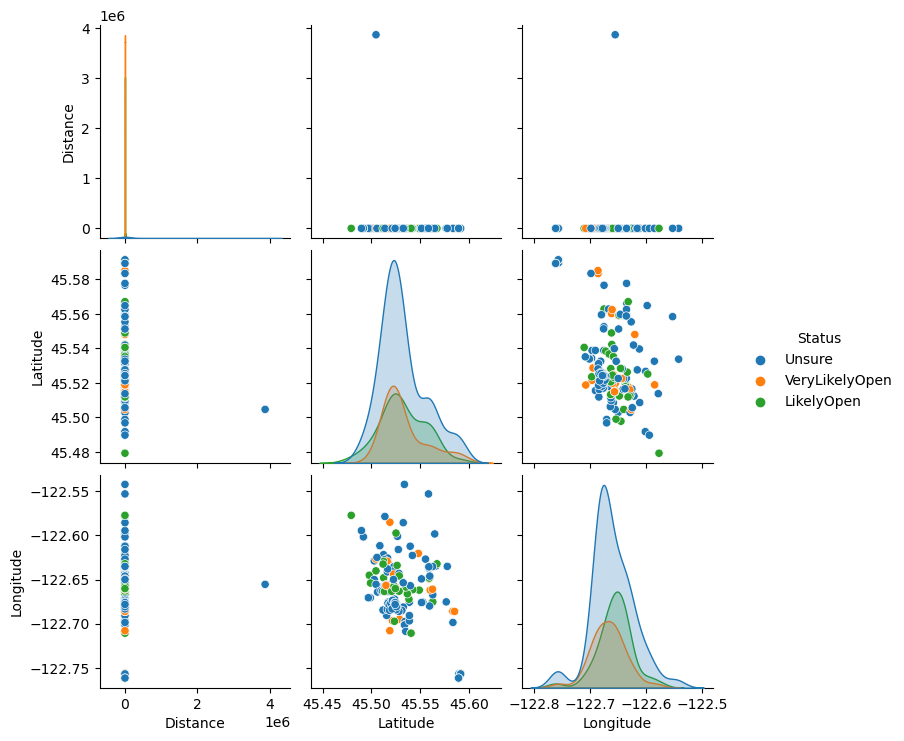

In [63]:
import seaborn as sns
sns.pairplot(a, hue='Status')

# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [4]:
import os
import requests
import pandas as pd

n=[]
locations_df = x

#Yelp_API
api_key = os.environ["API_YELP"]
url = 'https://api.yelp.com/v3/businesses/search'

#iterating over data from citybikes from dataframe x
for row in locations_df.itertuples(index=False):
    params = {
        'latitude': row.latitude,
        'longitude': row.longitude,
        'radius': 1000,
        'categories': 'galleries, All',
    }

    headers = {
        'Authorization': f'Bearer {api_key}'
    }

    result = requests.get(url, params=params, headers=headers)

    
    if result.status_code == 200:
        data = result.json()
        n.append(data)
        print(data)
    else:
        print(f"Error for {row.latitude},{row.longitude}: {result.status_code}")
        print(result.json())

{'businesses': [{'id': 'TzOMaXxHNNwvM4O9H8kgVQ', 'alias': 'nw-travelers-emporium-portland', 'name': 'NW Travelers Emporium', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/BLm39mPeUzM80gqg3cyIqA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/nw-travelers-emporium-portland?adjust_creative=_xpfsfofb-6xJjXmwjYPMA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xpfsfofb-6xJjXmwjYPMA', 'review_count': 10, 'categories': [{'alias': 'gemstonesandminerals', 'title': 'Gemstones & Minerals'}, {'alias': 'galleries', 'title': 'Art Galleries'}, {'alias': 'jewelry', 'title': 'Jewelry'}], 'rating': 4.5, 'coordinates': {'latitude': 45.51224, 'longitude': -122.62173}, 'transactions': [], 'location': {'address1': '3953 SE Hawthorne Blvd', 'address2': None, 'address3': '', 'city': 'Portland', 'zip_code': '97214', 'country': 'US', 'state': 'OR', 'display_address': ['3953 SE Hawthorne Blvd', 'Portland, OR 97214']}, 'phone': '+15032986831', 'display_phone': '(503) 

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [5]:
len(n)



238

In [38]:
qwerty=pd.json_normalize(n)
#qwerty['businesses'][5]
qwerty

businesses  total  \
0    [{'id': 'TzOMaXxHNNwvM4O9H8kgVQ', 'alias': 'nw...      2   
1    [{'id': 'dTtxMiXvHn6xtewMJlV7Uw', 'alias': 'ar...      2   
2    [{'id': 'VCqR5V5qiLDn9pLdosbVYA', 'alias': 'gr...      2   
3    [{'id': 'TzOMaXxHNNwvM4O9H8kgVQ', 'alias': 'nw...      1   
4                                                   []      0   
..                                                 ...    ...   
233  [{'id': 'CzIhSce7VduQIgTF1m6svQ', 'alias': 'ho...     18   
234  [{'id': 'CzIhSce7VduQIgTF1m6svQ', 'alias': 'ho...     15   
235  [{'id': 'SXbsinMjQblMaWoF9eA2fg', 'alias': 'sp...      1   
236  [{'id': 'dTtxMiXvHn6xtewMJlV7Uw', 'alias': 'ar...      4   
237  [{'id': 'cbiDQa6_8gQqOYr6XMYIqA', 'alias': 'ad...      1   

     region.center.longitude  region.center.latitude  
0                -122.614160               45.511950  
1                -122.611164               45.548276  
2                -122.602071               45.553917  
3                -122.616038               45.516585  
4                -122.623397               45.493337  
..                       ...                     ...  
233              -122.660052               45.517899  
234              -122.657650               45.518103  
235              -122.637669               45.498947  
236              -122.625588               45.552358  
237              -122.636043               45.570366  

[238 rows x 4 columns]

In [39]:
import json
businesses = pd.json_normalize(n, record_path ='businesses')
businesses

id                                        alias  \
0     TzOMaXxHNNwvM4O9H8kgVQ               nw-travelers-emporium-portland   
1     w8x2pmunLwZyIrnLnpSNxQ  sideshow-alley-tattoo-odditorium-portland-2   
2     dTtxMiXvHn6xtewMJlV7Uw         artistic-portland-gallery-portland-2   
3     uqkm5SR1vtdUlASNk-nuGw                      dirty-dishes-portland-2   
4     VCqR5V5qiLDn9pLdosbVYA                    gracewood-studio-portland   
...                      ...                                          ...   
1705  dTtxMiXvHn6xtewMJlV7Uw         artistic-portland-gallery-portland-2   
1706  UfIu4tcYSGWlAWTexVYAUw                    nucleus-portland-portland   
1707  ytkHzQbDFU64HVMGIcBiBg                    guardino-gallery-portland   
1708  rEQ1J7UlNOF4npjdw0GEJA                blind-insect-gallery-portland   
1709  cbiDQa6_8gQqOYr6XMYIqA                    adelante-gallery-portland   

                                  name  \
0                NW Travelers Emporium   
1     Sideshow Alley Tattoo Odditorium   
2            Artistic Portland Gallery   
3                         Dirty Dishes   
4                     Gracewood Studio   
...                                ...   
1705         Artistic Portland Gallery   
1706                  Nucleus Portland   
1707                  Guardino Gallery   
1708              Blind Insect Gallery   
1709                 Adelante! Gallery   

                                              image_url  is_closed  \
0     https://s3-media2.fl.yelpcdn.com/bphoto/BLm39m...      False   
1     https://s3-media2.fl.yelpcdn.com/bphoto/CiddWJ...      False   
2     https://s3-media3.fl.yelpcdn.com/bphoto/ImyzB_...      False   
3     https://s3-media2.fl.yelpcdn.com/bphoto/Ea-ZuT...      False   
4     https://s3-media2.fl.yelpcdn.com/bphoto/JDQi-1...      False   
...                                                 ...        ...   
1705  https://s3-media3.fl.yelpcdn.com/bphoto/ImyzB_...      False   
1706  https://s3-media3.fl.yelpcdn.com/bphoto/BvyEDf...      False   
1707  https://s3-media1.fl.yelpcdn.com/bphoto/a1TG0j...      False   
1708  https://s3-media2.fl.yelpcdn.com/bphoto/Rkbg8k...      False   
1709  https://s3-media2.fl.yelpcdn.com/bphoto/Z5auzX...      False   

                                                    url  review_count  \
0     https://www.yelp.com/biz/nw-travelers-emporium...            10   
1     https://www.yelp.com/biz/sideshow-alley-tattoo...            13   
2     https://www.yelp.com/biz/artistic-portland-gal...            18   
3     https://www.yelp.com/biz/dirty-dishes-portland...             1   
4     https://www.yelp.com/biz/gracewood-studio-port...             1   
...                                                 ...           ...   
1705  https://www.yelp.com/biz/artistic-portland-gal...            18   
1706  https://www.yelp.com/biz/nucleus-portland-port...            17   
1707  https://www.yelp.com/biz/guardino-gallery-port...            14   
1708  https://www.yelp.com/biz/blind-insect-gallery-...             6   
1709  https://www.yelp.com/biz/adelante-gallery-port...             1   

                                             categories  rating transactions  \
0     [{'alias': 'gemstonesandminerals', 'title': 'G...     4.5           []   
1     [{'alias': 'tattoo', 'title': 'Tattoo'}, {'ali...     4.0           []   
2     [{'alias': 'galleries', 'title': 'Art Gallerie...     5.0           []   
3     [{'alias': 'galleries', 'title': 'Art Gallerie...     5.0           []   
4     [{'alias': 'galleries', 'title': 'Art Gallerie...     4.0           []   
...                                                 ...     ...          ...   
1705  [{'alias': 'galleries', 'title': 'Art Gallerie...     5.0           []   
1706  [{'alias': 'galleries', 'title': 'Art Gallerie...     4.5           []   
1707  [{'alias': 'galleries', 'title': 'Art Gallerie...     4.0           []   
1708  [{'alias': 'galleries', 'title': 'Art Gallerie...     5.0           []  

In [87]:
new_df= businesses.drop(['image_url', 'url', 'alias', 'categories','location.address3','location.city','location.address2','transactions', 'phone', 'display_phone','location.address1', 'location.country'	, 'location.state', 'price'], axis=1)
new_df

id                              name  is_closed  \
0     TzOMaXxHNNwvM4O9H8kgVQ             NW Travelers Emporium      False   
1     w8x2pmunLwZyIrnLnpSNxQ  Sideshow Alley Tattoo Odditorium      False   
2     dTtxMiXvHn6xtewMJlV7Uw         Artistic Portland Gallery      False   
3     uqkm5SR1vtdUlASNk-nuGw                      Dirty Dishes      False   
4     VCqR5V5qiLDn9pLdosbVYA                  Gracewood Studio      False   
...                      ...                               ...        ...   
1705  dTtxMiXvHn6xtewMJlV7Uw         Artistic Portland Gallery      False   
1706  UfIu4tcYSGWlAWTexVYAUw                  Nucleus Portland      False   
1707  ytkHzQbDFU64HVMGIcBiBg                  Guardino Gallery      False   
1708  rEQ1J7UlNOF4npjdw0GEJA              Blind Insect Gallery      False   
1709  cbiDQa6_8gQqOYr6XMYIqA                 Adelante! Gallery      False   

      review_count  rating     distance  coordinates.latitude  \
0               10     4.5   594.210559             45.512240   
1               13     4.0   849.625341             45.504740   
2               18     5.0   717.048403             45.548145   
3                1     5.0   540.343430             45.548560   
4                1     4.0   623.759067             45.558590   
...            ...     ...          ...                   ...   
1705            18     5.0   620.147483             45.548145   
1706            17     4.5  1075.449774             45.559010   
1707            14     4.0  1056.845543             45.559270   
1708             6     5.0  1107.274487             45.559180   
1709             1     5.0   737.247435             45.561160   

      coordinates.longitude location.zip_code  \
0               -122.621730             97214   
1               -122.610690             97206   
2               -122.620370             97204   
3               -122.604260             97213   
4               -122.606682             97218   
...                     ...               ...   
1705            -122.620370             97204   
1706            -122.635615             97211   
1707            -122.635200             97211   
1708            -122.636040             97211   
1709            -122.658800             97211   

                              location.display_address  
0         [3953 SE Hawthorne Blvd, Portland, OR 97214]  
1        [2504 SE 50th Ave, Ste E, Portland, OR 97206]  
2             [4110 NE Fremont St, Portland, OR 97204]  
3             [5709 NE Fremont St, Portland, OR 97213]  
4                   [4920 NE 55th, Portland, OR 97218]  
...                                                ...  
1705          [4110 NE Fremont St, Portland, OR 97204]  
1706  [2916 NE Alberta St, Unit B, Portland, OR 97211]  
1707          [2939 NE Alberta St, Portland, OR 97211]  
1708          [2841 NE Alberta St, Portland, OR 97211]  
1709                              [Portland, OR 97211]  

[1710 rows x 10 columns]

In [88]:
h= new_df.duplicated(['name']).sum()
h


1588

In [89]:
print(new_df[new_df.duplicated(['name'])])

                          id                       name  is_closed  \
5     uqkm5SR1vtdUlASNk-nuGw               Dirty Dishes      False   
6     TzOMaXxHNNwvM4O9H8kgVQ      NW Travelers Emporium      False   
31    yy8cp3oyoCH3DSVyGcoqEg           Gallery Homeland      False   
32    scEIoh0WU8YOuittSu83_Q    Concrete Arcade Gallery      False   
33    SXbsinMjQblMaWoF9eA2fg             Splendorporium      False   
...                      ...                        ...        ...   
1704  SXbsinMjQblMaWoF9eA2fg             Splendorporium      False   
1705  dTtxMiXvHn6xtewMJlV7Uw  Artistic Portland Gallery      False   
1706  UfIu4tcYSGWlAWTexVYAUw           Nucleus Portland      False   
1707  ytkHzQbDFU64HVMGIcBiBg           Guardino Gallery      False   
1708  rEQ1J7UlNOF4npjdw0GEJA       Blind Insect Gallery      False   

      review_count  rating     distance  coordinates.latitude  \
5                1     5.0   636.230639             45.548560   
6               10     4.5   

In [90]:
new_df.sort_values("name", inplace = False)


id                 name  is_closed  review_count  \
1000  NRAVSzn4_kf9NIsBBDpxOQ  100th Monkey Studio      False             4   
770   NRAVSzn4_kf9NIsBBDpxOQ  100th Monkey Studio      False             4   
565   NRAVSzn4_kf9NIsBBDpxOQ  100th Monkey Studio      False             4   
870   NRAVSzn4_kf9NIsBBDpxOQ  100th Monkey Studio      False             4   
530   NRAVSzn4_kf9NIsBBDpxOQ  100th Monkey Studio      False             4   
...                      ...                  ...        ...           ...   
781   vymGRJCUsANOMxCmqRXf5Q                p:ear      False             2   
1417  vymGRJCUsANOMxCmqRXf5Q                p:ear      False             2   
933   vymGRJCUsANOMxCmqRXf5Q                p:ear      False             2   
212   vymGRJCUsANOMxCmqRXf5Q                p:ear      False             2   
1087  vymGRJCUsANOMxCmqRXf5Q                p:ear      False             2   

      rating     distance  coordinates.latitude  coordinates.longitude  \
1000     5.0   984.107686             45.521987            -122.649415   
770      5.0   785.817518             45.521987            -122.649415   
565      5.0   996.921915             45.521987            -122.649415   
870      5.0   574.783396             45.521987            -122.649415   
530      5.0   476.047029             45.521987            -122.649415   
...      ...          ...                   ...                    ...   
781      5.0   979.884147             45.525760            -122.676200   
1417     5.0   507.085440             45.525760            -122.676200   
933      5.0  1160.319994             45.525760            -122.676200   
212      5.0   495.216551             45.525760            -122.676200   
1087     5.0   568.320220             45.525760            -122.676200   

     location.zip_code               location.display_address  
1000             97214  [110 SE 16th Ave, Portland, OR 97214]  
770              97214  [110 SE 16th Ave, Portland, OR 97214]  
565              97214  [110 SE 16th Ave, Portland, OR 97214]  
870              97214  [110 SE 16th Ave, Portland, OR 97214]  
530              97214  [110 SE 16th Ave, Portland, OR 97214]  
...                ...                                    ...  
781              97209   [338 NW 6th Ave, Portland, OR 97209]  
1417             97209   [338 NW 6th Ave, Portland, OR 97209]  
933              97209   [338 NW 6th Ave, Portland, OR 97209]  
212              97209   [338 NW 6th Ave, Portland, OR 97209]  
1087             97209   [338 NW 6th Ave, Portland, OR 97209]  

[1710 rows x 10 columns]

In [132]:
new_df2 = new_df.drop_duplicates(subset ="coordinates.latitude", keep = 'first', inplace = False)
new_df2

id                              name  is_closed  \
0     TzOMaXxHNNwvM4O9H8kgVQ             NW Travelers Emporium      False   
1     w8x2pmunLwZyIrnLnpSNxQ  Sideshow Alley Tattoo Odditorium      False   
2     dTtxMiXvHn6xtewMJlV7Uw         Artistic Portland Gallery      False   
3     uqkm5SR1vtdUlASNk-nuGw                      Dirty Dishes      False   
4     VCqR5V5qiLDn9pLdosbVYA                  Gracewood Studio      False   
...                      ...                               ...        ...   
1424  5mBV7kV8BE9lWYKoG9QhxA                Kelly Williams Art      False   
1455  KNEpt-gc9_iadz-aniAxgQ         St. Johns Clay Collective      False   
1563  xqBjjE3lsBWCEj1CulMGSg                       Mile Post 5      False   
1564  jccddY2ItZWEkvjypM6A7g                     Mesman Images      False   
1709  cbiDQa6_8gQqOYr6XMYIqA                 Adelante! Gallery      False   

      review_count  rating     distance  coordinates.latitude  \
0               10     4.5   594.210559             45.512240   
1               13     4.0   849.625341             45.504740   
2               18     5.0   717.048403             45.548145   
3                1     5.0   540.343430             45.548560   
4                1     4.0   623.759067             45.558590   
...            ...     ...          ...                   ...   
1424             2     5.0  1207.574831             45.578270   
1455             7     4.5   519.587562             45.589340   
1563             7     3.5   457.674363             45.529415   
1564             3     1.0   695.722524             45.532547   
1709             1     5.0   737.247435             45.561160   

      coordinates.longitude location.zip_code  \
0               -122.621730             97214   
1               -122.610690             97206   
2               -122.620370             97204   
3               -122.604260             97213   
4               -122.606682             97218   
...                     ...               ...   
1424            -122.705660             97217   
1455            -122.761460             97203   
1563            -122.579399             97213   
1564            -122.585518             97213   
1709            -122.658800             97211   

                               location.display_address  
0          [3953 SE Hawthorne Blvd, Portland, OR 97214]  
1         [2504 SE 50th Ave, Ste E, Portland, OR 97206]  
2              [4110 NE Fremont St, Portland, OR 97204]  
3              [5709 NE Fremont St, Portland, OR 97213]  
4                    [4920 NE 55th, Portland, OR 97218]  
...                                                 ...  
1424  [7621 N Washburne Ave, Ste 35, Portland, OR 97...  
1455  [6635 N Baltimore St, Ste 110, Portland, OR 97...  
1563     [900 NE 81st Ave, Ste 203, Portland, OR 97213]  
1564             [1322 NE 75th Ave, Portland, OR 97213]  
1709                               [Portland, OR 97211]  

[117 rows x 10 columns]

In [137]:
renamed_df= new_df2.rename (columns= {'id':'Address', 'name': 'Name', 'distance':'Distance', 'name':'Name', 'is_closed':'StatusClosed', 'review_count':'ReviewCount', 'rating':'Rating',
                        'coordinates.latitude': 'Latitude', 'coordinates.longitude': 'Longitude', 'location.display_address': 'Address'})
renamed_df

Address                              Name  StatusClosed  \
0     TzOMaXxHNNwvM4O9H8kgVQ             NW Travelers Emporium         False   
1     w8x2pmunLwZyIrnLnpSNxQ  Sideshow Alley Tattoo Odditorium         False   
2     dTtxMiXvHn6xtewMJlV7Uw         Artistic Portland Gallery         False   
3     uqkm5SR1vtdUlASNk-nuGw                      Dirty Dishes         False   
4     VCqR5V5qiLDn9pLdosbVYA                  Gracewood Studio         False   
...                      ...                               ...           ...   
1424  5mBV7kV8BE9lWYKoG9QhxA                Kelly Williams Art         False   
1455  KNEpt-gc9_iadz-aniAxgQ         St. Johns Clay Collective         False   
1563  xqBjjE3lsBWCEj1CulMGSg                       Mile Post 5         False   
1564  jccddY2ItZWEkvjypM6A7g                     Mesman Images         False   
1709  cbiDQa6_8gQqOYr6XMYIqA                 Adelante! Gallery         False   

      ReviewCount  Rating     Distance   Latitude   Longitude  \
0              10     4.5   594.210559  45.512240 -122.621730   
1              13     4.0   849.625341  45.504740 -122.610690   
2              18     5.0   717.048403  45.548145 -122.620370   
3               1     5.0   540.343430  45.548560 -122.604260   
4               1     4.0   623.759067  45.558590 -122.606682   
...           ...     ...          ...        ...         ...   
1424            2     5.0  1207.574831  45.578270 -122.705660   
1455            7     4.5   519.587562  45.589340 -122.761460   
1563            7     3.5   457.674363  45.529415 -122.579399   
1564            3     1.0   695.722524  45.532547 -122.585518   
1709            1     5.0   737.247435  45.561160 -122.658800   

     location.zip_code                                            Address  
0                97214       [3953 SE Hawthorne Blvd, Portland, OR 97214]  
1                97206      [2504 SE 50th Ave, Ste E, Portland, OR 97206]  
2                97204           [4110 NE Fremont St, Portland, OR 97204]  
3                97213           [5709 NE Fremont St, Portland, OR 97213]  
4                97218                 [4920 NE 55th, Portland, OR 97218]  
...                ...                                                ...  
1424             97217  [7621 N Washburne Ave, Ste 35, Portland, OR 97...  
1455             97203  [6635 N Baltimore St, Ste 110, Portland, OR 97...  
1563             97213     [900 NE 81st Ave, Ste 203, Portland, OR 97213]  
1564             97213             [1322 NE 75th Ave, Portland, OR 97213]  
1709             97211                               [Portland, OR 97211]  

[117 rows x 10 columns]

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

Foursquare helped locate more Art Galleries close to the bike station. However, I feel dataframe retrieved from Yelp has more useful details such as rating and total ratings.  

Get the top 10 restaurants according to their rating

In [134]:
top= renamed_df.sort_values('Rating',ascending=False,inplace=False)
top.head(10)

Address                            Name  StatusClosed  \
1709  cbiDQa6_8gQqOYr6XMYIqA               Adelante! Gallery         False   
72    5-cX0uKITng4ONhwxRTQkQ                     Blanc Space         False   
141   nmc8ANGSvWKn7qW4tR0F3Q         Working Artists Gallery         False   
42    YGmGH31NI-kJiVIKi5iLqw              High Low Art Space         False   
44    dMNEgxdavXVMLIbCI15jKw  Stark Street Studios & Gallery         False   
471   V-WRkJVcjCid2Pvrd3vmFw          Bird's Eye View Studio         False   
470   rEQ1J7UlNOF4npjdw0GEJA            Blind Insect Gallery         False   
48    QiS25JDJVrlP9G24gykeNA               i witness gallery         False   
469   Pw29CE8Hl8LfOrlaDx88kg                    StuStuStudio         False   
51    Pao3QJziFccq9pl89MUZMg                     Robin Becic         False   

      ReviewCount  Rating    Distance   Latitude   Longitude  \
1709            1     5.0  737.247435  45.561160 -122.658800   
72              1     5.0  514.776456  45.521140 -122.656970   
141             1     5.0  751.006386  45.529774 -122.680488   
42              4     5.0  519.062077  45.515870 -122.629260   
44              1     5.0  382.351540  45.519530 -122.637010   
471             1     5.0  993.963819  45.551327 -122.649040   
470             6     5.0  522.498191  45.559180 -122.636040   
48              1     5.0  428.532023  45.515320 -122.665530   
469             4     5.0  423.505076  45.559300 -122.648148   
51              1     5.0  793.235670  45.513560 -122.676050   

     location.zip_code                                          Address  
1709             97211                             [Portland, OR 97211]  
72               97214    [215 SE 9th Ave, Ste 307, Portland, OR 97214]  
141              97209                             [Portland, OR 97209]  
42               97214             [936 SE 34th St, Portland, OR 97214]  
44               97214           [2809 SE Stark St, Portland, OR 97214]  
471              97212           [3934 NE 16th Ave, Portland, OR 97212]  
470              97211         [2841 NE Alberta St, Portland, OR 97211]  
48               97214  [1028 SE Water Ave, Ste 50, Portland, OR 97214]  
469              97211  [1627 NE Alberta St, Ste 6, Portland, OR 97211]  
51               97201            [1307 SW 1st Ave, Portland, OR 97201]

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

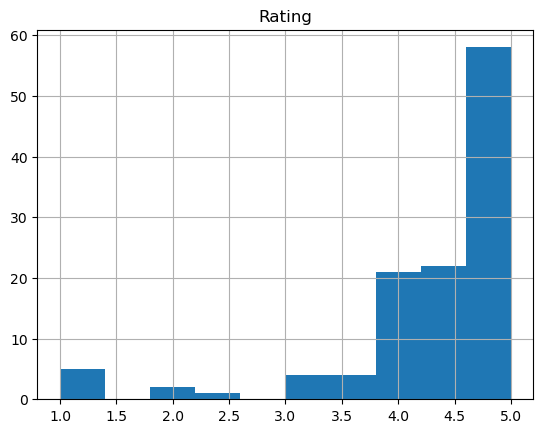

In [135]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

renamed_df.hist(column = 'Rating')
